Grupo 9
Dámaso Sánchez Arenas
Eduardo Rodríguez de Castro Zaloña

# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pr
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

# Descargamos el conjunto de datos que necesitamos

In [3]:
data = datasets.load_wine()

# 1. Descripción y análisis del conjunto de datos

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Los datos estan representados como un diccionario con las siguientes llaves:

- __data__: Contiene los datos númericos.Representado como un array donde cada elemento es un array de                    elementos
- __target__: Clase que queremos predecir
- __target_names__: los nombres de las clases
- __DESCR__: Descripción del conjunto de datos
- __feature_names__: Son los nombres que caracterizan los elementos del array, de cada individuo del conjunto de datos


In [5]:
data['feature_names'] #Obtenemos las caracteristicas de cada individuo del dataset en cuestión

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
data['target'] #Vemos el valor del target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:

data['target_names'] #Obtenemos los nombres de las clases del dataset en cuestión

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
#Obtenemos los valores de las caracteristicas de cada uno de los individuos 
df = pd.DataFrame(data=data['data'], columns=data['feature_names']) 
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [9]:
#Obtenemos que las caracteristicas de los individuos son de tipo numerico, concreatamente: float64
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [10]:
# Añadimos una columna con el nombre de la clase a la que peretenece cada individuo
df['Clase'] = data['target']
dic_target = { 0 : 'Clase0', 1: 'Clase1', 2: 'Clase2'}
df['Clase'] = df['Clase'].map(dic_target)

# Mostrar sólo las primeras filas de la tabla
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline   Clase  
0                          3.92   1065.0  Clase0  
1                          3.40   1050.0  Clase0  
2                          3.17   1185.0  Clase0  
3                          3.45   1480.0  Clase0  
4                          2.93    735.0  Clase0

Estos datos nos dan una idea de como estan distribuidos los datos con los percentiles. 
Podemos ver los dos extremos de las variables (min,max) y la media.

Para apoyarnos y poder sacar mejores conclusiones vamos a realizar unos graficos

In [11]:
# Mostramos datos estadísticos de cada columna
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

C:\Users\eduvo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


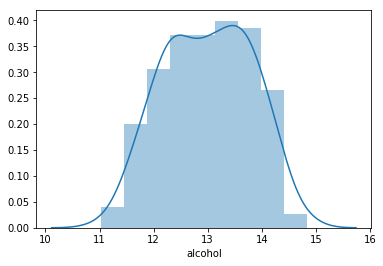

In [12]:
sns.distplot(df['alcohol'])

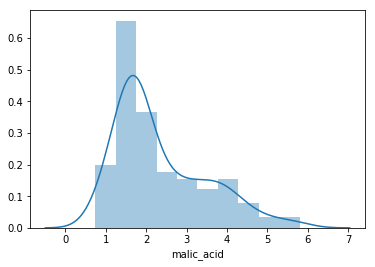

In [13]:
sns.distplot(df['malic_acid'])

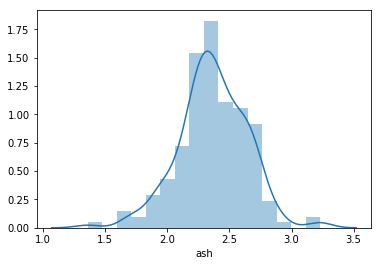

In [14]:
sns.distplot(df['ash'])

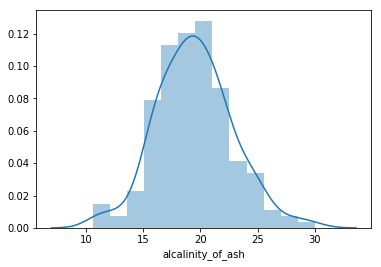

In [15]:
sns.distplot(df['alcalinity_of_ash'])

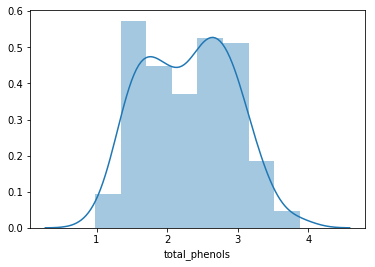

In [16]:
sns.distplot(df['total_phenols'])

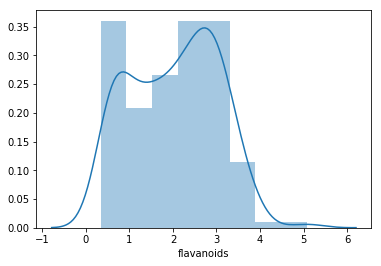

In [17]:
sns.distplot(df['flavanoids'])

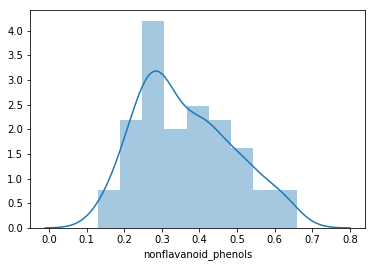

In [18]:
sns.distplot(df['nonflavanoid_phenols'])

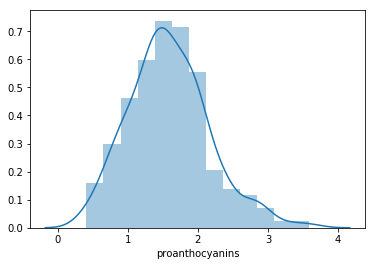

In [19]:
sns.distplot(df['proanthocyanins'])

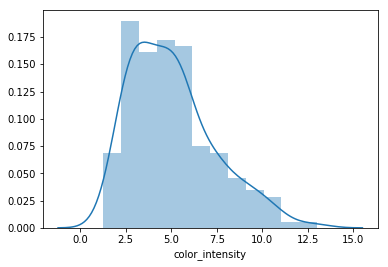

In [20]:
sns.distplot(df['color_intensity'])

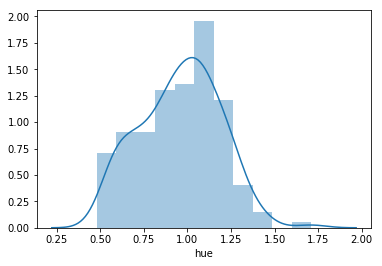

In [21]:
sns.distplot(df['hue'])

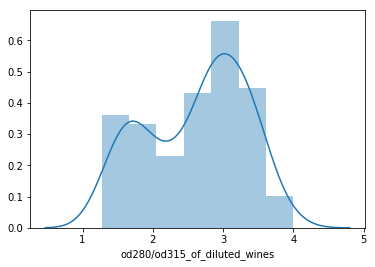

In [22]:
sns.distplot(df['od280/od315_of_diluted_wines'])

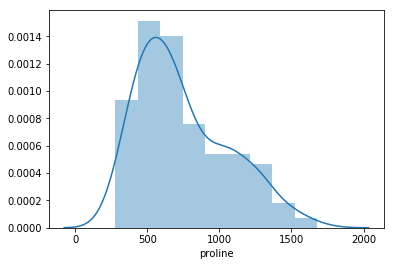

In [23]:
sns.distplot(df['proline'])

Como vemos, ninguna de las caracteristicas hace picos extraños sino que todas tienden a ir subiendo poco a poco
hasta su punto mas alto y acaban bajando progresivamente. 

Si es cierto que algunas caracteristicas como od280_od315_of_diluted_wines hacen mas movimientos 
pero tampoco nada alarmante.

A continuación, vamos a estudiar la correlación que existen entre las caracteristicas

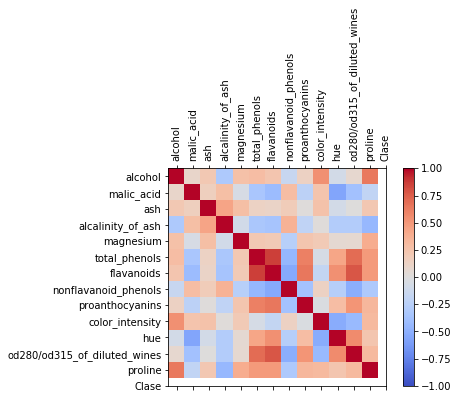

In [24]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Como vemos en el grafico, la mayoria de las caracteristicas estan correlacionadas (las que tienden a un color rojo),
sin embargo, es cierto que algunas caracteristicas no se correlacionan (las que tienen mas al azul).

LLama la atención que algunas caracteristicas como alcalinity_of_ash, nonflavanoid_phenols y alguna más,
apena correlacione con nada.

# 2. ¿Debemos normalizar o estandarizar  las  variables antes de usar el arbol de decisión?

No es necesario ya que las escalas de las caracteristicas no son muy diferentes y por ello no es necesario normalizar. En el caso en el que las escalas fueran muy diferentes si seria necesario normalizar para ponerlas en la misma escala.

# 3. Conjunto de test y análisis en función de la profundidad maxima del árbol. 

In [25]:
# Fijar generador de números aleatorios para obtener siempre los mismos resultados
np.random.seed(28)  

In [26]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [27]:
# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier()
clf = clf.fit(data.data, data.target)

In [33]:
from sklearn.model_selection import train_test_split

# Partimos el conjunto de datos en entrenamiento (70%) y prueba (30%)
# random_state es la semilla del generador de números aleatorios. Normalmente no se establece pero
# nosotros lo usamos para obtener siempre el mismo resultado.
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                             max_depth=3,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=0)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(0.9919354838709677, 0.9629629629629629)

Antes de analizar los datos vamos a fijar varios conceptos:

___train-accuracy --> Precisión que se obtiene con los datos de entrenamiento (datos conocidos)__

___test-accuracy --> Precisión que se obtiene con los datos de test (datos nuevos)__

Como es logico la variable importante y donde nos debemos fijar principalmente es la precision con datos de nuevos, 
aunque es cierto que tambien es bueno fijarse y comparar la de entrenamiento.

__Dicho esto procedemos a hacer el analisis:__

Tras varias pruebas cambiando la maxima altura del arbol vemos que la altura optima es aquella que sea mayor que 3,
ya que a partir de 3 la precision de test (datos nuevos) siempre es 0.96 (aprox), mientras que si ponemos una altura
menor el resultado de precision de test es peor, lo cual quiere decir que se ajusta peor.

Al poner una altura de 3, obtenemos un arbol de decisión más ajustado ya que aunque la precision de entrenamiento sea menor,la precision de test (con datos nuevos) es mayor y es aquí donde debemos fijarnos, ya que significa
que nuestro arbol se adapta mejor a nuevos datos.

## Evolucion de la curva de aprendizaje y valor optimo del párametro

Limitar la profundidad máxima del árbol de decisión puede servir para obtener un clasificador menos "ajustado" a los datos de entrenamiento y, por tanto, que generalice mejor en datos nuevos.
Podemos calcular la profundidad optima usando validación cruzada y probando distintos valores de ese parámetro.

In [38]:
from sklearn.model_selection import cross_validate
import numpy as np

train_accuracy = []
test_accuracy = []

max_depths = range(1, 6)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, data.data, data.target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

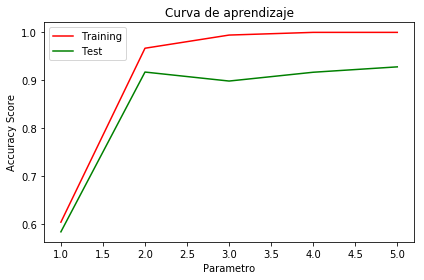

In [39]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Como hemos comentado antes, Para max_depth=3 obtenemos el mejor valor de exactitud para el conjunto de prueba. 
A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y
empeora para el conjunto de prueba indicando que el clasificador está sobre-entrenado y generaliza peor.

Podríamos hacer lo mismo con el resto de parámetros del árbol hasta encontrar lo que funcionan mejor para nuestro conjunto de datos.

# 4. Árbol de decision optimo y analisis

## A) ¿Qué Clases ha clasificado mejor?

La clase que ha clasificado mejor es la clase número 3 porque ha clasificado todas bien como veremos en la matriz de confusión de más abajo

## A) ¿Qué sentido tiene esa pregunta y la clasificacion que infiere dentro del problema?

## B) ¿Existen variables que sirven para discriminar entre algunas clases?

## C) ¿Existen variables del conjunto de datos que no se han usado?

## D) Nodos en los que existe mayor confusión

# 5. Árbol de decisión sub-óptimo que sobreaprende. Identifica los nuevos nodos.

# 6. Matriz de confusión de los datos test. 

In [34]:
predictions=clf.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[18,  1,  0],
       [ 0, 21,  1],
       [ 0,  0, 13]], dtype=int64)

Como podemos observar, acierta en casi todos los casos, excepto dos veces.

In [35]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      0.95      0.95        22
           2       0.93      1.00      0.96        13

   micro avg       0.96      0.96      0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



## Analisis valores "precisión" y "Recall" para cada una de las clases

# 7. Configuración clasificador k-NN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

for i in range(1,10):
    
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')

    clf.fit(X_train, y_train)

    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    print('k :',i)
    print(train_accuracy, test_accuracy)

k : 1
1.0 0.7592592592592593
k : 2
1.0 0.7592592592592593
k : 3
1.0 0.7407407407407407
k : 4
1.0 0.7777777777777778
k : 5
1.0 0.7962962962962963
k : 6
1.0 0.7777777777777778
k : 7
1.0 0.7962962962962963
k : 8
1.0 0.7962962962962963
k : 9
1.0 0.7407407407407407


## A) ¿Tiene sentido escalar los datos?

Creemos que si hace falta escalar los datos porque nuestro modelo podría salir perjudicado por las magnitudes de las features. Además siempre es una buena práctica escalar los datos

## B) Valor optimo de K para que no sobreaprenda

Como hemos visto arriba en todos los train nuestro modelo tiene overfit. Hemos probado cambiando los valores y siempre nos da ese score.

## C) Comparar resultados de precisión y recall de k-NN con los de el arbol de decisión

El recall y la precisión del arbol de decisión es mucho más alta casi siempre cercana al 1, en cambio en el k-NN no es del todo alta incluso en la clase 2 se acerca al 0.50

In [70]:
predictions=clf.predict(X_test)

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.76      0.73      0.74        22
           2       0.53      0.62      0.57        13

   micro avg       0.74      0.74      0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.75        54

